# Model Building

In [ ]:
!pip install imblearn
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install feature_engine
!pip install lightgbm
!pip install catboost
!pip install category_encoders
!pip install numpy
!pip install sdv
!pip install optuna
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install scikeras[tensorflow]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

In [3]:
popularity_threshold = df['popularity'].quantile(0.75)
df['popularity_flag'] = (df['popularity'] > popularity_threshold).astype(int)

In [4]:
df.drop(['popularity'],axis=1,inplace =True)
df['explicit'] = df['explicit'].astype(int)

In [5]:
df.head(10)


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_flag
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1
5,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,1
6,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,1
7,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,1
8,189613,0,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,1
9,205594,0,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,1


In [6]:
from sklearn.model_selection import train_test_split
from collections import Counter


categorical_columns = ['track_genre','key','time_signature']

#specify the continuous columns to be scaled
continuous_columns = ['loudness', 'duration_ms','tempo']


X = df.drop("popularity_flag", axis=1)
y = df["popularity_flag"]

#convert categorical columns to type string for target encoder to work properly except for binary categorical features
X[categorical_columns]=X[categorical_columns].astype(str)
counter = Counter(y)
# find out the ratio of minority class to majority class for smote-nc
estimate = counter[1] / counter[0]
print('Ratio of minority to majority class: %.3f' % estimate)


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=200,stratify=y)


X


Ratio of minority to majority class: 0.319


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80413,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
80414,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
80415,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
80416,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

categorical_columns = ['track_genre','key','time_signature']

continuous_columns = ['loudness', 'duration_ms','tempo']

continuous_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", TargetEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", continuous_transformer, continuous_columns),
        ("cat", categorical_transformer, categorical_columns),
    ]
    ,remainder="passthrough"
)
preprocessor.set_output(transform='pandas')
preprocessor 

X_processed = preprocessor.fit_transform(X_train,y_train)
X_processed

,num__loudness,num__duration_ms,num__tempo,cat__track_genre,cat__key,cat__time_signature,remainder__explicit,remainder__danceability,remainder__energy,remainder__mode,remainder__speechiness,remainder__acousticness,remainder__instrumentalness,remainder__liveness,remainder__valence
22832,0.856655,0.034784,0.753561,0.134801,0.219927,0.247364,0,0.247,0.9370,0,0.0914,0.09480,0.789000,0.7210,0.1350
79002,0.452671,0.013243,0.932185,0.049307,0.237047,0.247364,0,0.282,0.0663,0,0.0448,0.98900,0.930000,0.0985,0.1550
27606,0.762096,0.051423,0.519441,0.300000,0.237047,0.247364,0,0.492,0.4740,1,0.0351,0.82300,0.000022,0.0855,0.2700
80020,0.677006,0.053029,0.578540,0.244152,0.235755,0.247364,0,0.327,0.2690,1,0.0339,0.82500,0.000234,0.1080,0.0857
49203,0.757674,0.058443,0.466693,0.736842,0.212296,0.247364,0,0.822,0.4460,0,0.0321,0.48600,0.001020,0.1470,0.6540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,0.713068,0.084112,0.482410,0.007926,0.253307,0.247364,0,0.744,0.8100,1,0.0473,0.02400,0.907000,0.0606,0.7150
51104,0.808933,0.037263,0.347507,0.169972,0.265264,0.247364,0,0.817,0.5390,0,0.0621,0.01410,0.000496,0.0990,0.1580
65722,0.715742,0.026102,0.464733,0.141876,0.249466,0.247364,0,0.545,0.3350,1,0.0300,0.91700,0.000714,0.1770,0.3060
5218,0.776911,0.021603,0.597531,0.011688,0.212296,0.201184,0,0.504,0.5770,0,0.0315,0.01280,0.215000,0.1070,0.7210


In [8]:
from imblearn.over_sampling import SMOTENC

smoteNC = SMOTENC(random_state=42, categorical_features=[1,4,6,13,14],n_jobs=4)
smoteNC2 = SMOTENC(random_state=42, categorical_features=[3,4,5,6,9],n_jobs=4)

In [9]:
from feature_engine.selection import DropCorrelatedFeatures

fes = DropCorrelatedFeatures(threshold=0.3)

In [10]:

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score,f1_score
from imblearn.pipeline import Pipeline as imbpipeline


In [11]:
def eval_base_models(n_folds, model, X, y):
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=200)
    scoring = ['balanced_accuracy', 'average_precision', 'f1']

    results = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=1)
    balanced_acc = results['test_balanced_accuracy']
    ap_score = results['test_average_precision']
    f1_score = results['test_f1']

    # create a DataFrame to store the mean and standard deviation of the scores
    data = {
        'score': ['balanced_accuracy', 'average_precision', 'f1_score'],
        'mean': [balanced_acc.mean(), ap_score.mean(), f1_score.mean()],
        'std': [balanced_acc.std(), ap_score.std(), f1_score.std()]
    }
    df = pd.DataFrame(data)

    # print the results
    print(f'Average precision: {ap_score.mean():.3f} (+/- {ap_score.std():.3f})')
    print(f'F1 score: {f1_score.mean():.3f} (+/- {f1_score.std():.3f})')
    print(f'Balanced accuracy: {balanced_acc.mean():.3f} (+/- {balanced_acc.std():.3f})')

    return df

### Compare oversampling and feature selection technique on the performance of baseline svc model

In [12]:
from sklearn.svm import LinearSVC



svc = LinearSVC(dual=False)
baseline_SVC = imbpipeline(
    [
        ('preprocessor', preprocessor),
        ('classifier', svc)
    ]
)



oversampling_SVC = imbpipeline(
    [
        ('over', smoteNC),
        ('preprocessor', preprocessor),
        ('classifier', svc)
    ]
)

feature_selction_SVC =imbpipeline(
    [
        ('preprocessor', preprocessor),
        ('feature_selection',fes),
        ('classifier', svc)
    ]
)

both_SVC = imbpipeline(
    [
        ('over', smoteNC),
        ('preprocessor', preprocessor),
        ('feature_selection',fes),
        ('classifier', svc)
    ]
)

oversampling2_SVC = imbpipeline(
    [
        ('preprocessor', preprocessor),
        ('over', smoteNC2),
        ('classifier', svc)
    ]
)
models = [
    ('baseline', baseline_SVC),
    ('oversampling', oversampling_SVC),
    ('feature_selection', feature_selction_SVC),
    ('both', both_SVC),
    ('oversampling2', oversampling2_SVC),

]

# initialize a list to store the results for each model
results = []

# iterate over the list of models
for name, model in models:
    # evaluate the model using the eval_base_models function
    df = eval_base_models(5, model, X, y)

    # add the model name to the DataFrame
    df['model'] = name

    # add the DataFrame to the list of results
    results.append(df)

df_combined = pd.concat(results, ignore_index=True)


Average precision: 0.630 (+/- 0.005)
F1 score: 0.533 (+/- 0.008)
Balanced accuracy: 0.687 (+/- 0.005)
Average precision: 0.606 (+/- 0.005)
F1 score: 0.596 (+/- 0.005)
Balanced accuracy: 0.754 (+/- 0.004)
Average precision: 0.628 (+/- 0.005)
F1 score: 0.528 (+/- 0.004)
Balanced accuracy: 0.684 (+/- 0.002)
Average precision: 0.609 (+/- 0.005)
F1 score: 0.596 (+/- 0.005)
Balanced accuracy: 0.754 (+/- 0.004)
Average precision: 0.627 (+/- 0.004)
F1 score: 0.608 (+/- 0.006)
Balanced accuracy: 0.753 (+/- 0.005)


In [13]:
df_pivot = df_combined.pivot(index='model', columns='score')

# display the pivoted DataFrame
df_pivot

mean                              \
score             average_precision balanced_accuracy  f1_score   
model                                                             
baseline                   0.630397          0.687034  0.532710   
both                       0.608667          0.753689  0.596222   
feature_selection          0.627933          0.684463  0.528416   
oversampling               0.605969          0.754218  0.596470   
oversampling2              0.627238          0.753277  0.608240   

                                std                              
score             average_precision balanced_accuracy  f1_score  
model                                                            
baseline                   0.005217          0.004777  0.008199  
both                       0.004643          0.003505  0.004734  
feature_selection          0.005101          0.002420  0.004158  
oversampling               0.005173          0.003581  0.004911  
oversampling2              0.004290          0.004862  0.006231

## Use optuna for hyperparameter tuning

#### LinearSVC Model

In [12]:
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler

c:\Users\zheng\Documents\MMU SHIT\YEAR2\SEM2\DATA SCIENCE FUNDAMENTALS\Music-Popularity-Prediction\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def objective(trial,model,params,n_jobs=2):
    # Define the hyperparameters to optimize
    # Set the hyperparameters of the pipeline
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=200)

    model.set_params(
        **params
    )
    scoring = ['average_precision','f1']
    # Evaluate the pipeline using cross-validation
    scores = cross_validate(model, X_train, y_train, cv=cv,scoring = scoring,n_jobs=n_jobs)

    return scores['test_average_precision'].mean(),scores['test_f1'].mean()

In [14]:
def evaluate_study(model,best_params,linear=False):

    print(best_params)
    model.set_params(**best_params)


    model.fit(X_train, y_train)

    y_hat = model.predict(X_test) 
    if linear:
        y_proba = model.decision_function(X_test)
    else:
        y_proba = model.predict_proba(X_test)[:,1]
        
    print(classification_report(y_test, y_hat))
    cm = confusion_matrix(y_test,y_hat)

    # cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # plot the heatmap
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
    # add labels
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    print(f1_score(y_test,y_hat))
    print(average_precision_score(y_test,y_proba))

In [17]:
from sklearn.svm import LinearSVC



svc = LinearSVC(dual=False)
pipe_SVC = imbpipeline(
    [ 
     ('preprocessor', preprocessor),

    ('over',smoteNC2),

     ('classifier',svc)
     ]
    )
def create_svcspace(trial):
    return {
        'classifier__C': trial.suggest_float("classifier__C", 0.2, 1),
        'classifier__max_iter': trial.suggest_int('classifier__max_iter', 100, 1000),
        'over__sampling_strategy': trial.suggest_float("over__sampling_strategy", 0.35, 1.00),
        'over__k_neighbors': trial.suggest_int('over__k_neighbors', 1, 30),
    }
svc_func = lambda trial: objective(trial,pipe_SVC,create_svcspace(trial))

svc_study = optuna.create_study(directions=['maximize','maximize'],pruner=MedianPruner(),study_name='svc_study',storage='sqlite:///my_study.db',sampler = TPESampler(seed=100))
svc_study.optimize(svc_func, n_trials=30,n_jobs=4)
# # study = optuna.load_study(study_name="svc_study", storage="sqlite:///my_study.db")




[I 2023-04-27 17:16:56,434] A new study created in RDB with name: svc_study
[I 2023-04-27 17:18:34,848] Trial 0 finished with values: [0.6271378864955628, 0.60496196260026] and parameters: {'classifier__C': 0.21065760532526429, 'classifier__max_iter': 764, 'over__sampling_strategy': 0.8704123341552652, 'over__k_neighbors': 12}. 
[I 2023-04-27 17:18:35,001] Trial 2 finished with values: [0.6259430247417687, 0.6031775257543313] and parameters: {'classifier__C': 0.5157974012489253, 'classifier__max_iter': 431, 'over__sampling_strategy': 0.7783524651253351, 'over__k_neighbors': 10}. 
[I 2023-04-27 17:18:45,612] Trial 3 finished with values: [0.6253452764179211, 0.6040863263964994] and parameters: {'classifier__C': 0.8805440603466927, 'classifier__max_iter': 391, 'over__sampling_strategy': 0.7941995707563849, 'over__k_neighbors': 25}. 
[I 2023-04-27 17:18:45,666] Trial 1 finished with values: [0.6253452764179211, 0.6040863263964994] and parameters: {'classifier__C': 0.7929614191569014, 'cla

In [42]:
svc_study = optuna.load_study(study_name="svc_study", storage="sqlite:///my_study.db")
optuna.visualization.plot_pareto_front(svc_study, target_names=["Mean PR AUC", "Mean F1"])

{'classifier__C': 0.20159948785739282, 'classifier__max_iter': 964, 'over__k_neighbors': 3, 'over__sampling_strategy': 0.9873481559692521}
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     12191
           1       0.54      0.70      0.61      3893

    accuracy                           0.78     16084
   macro avg       0.72      0.76      0.73     16084
weighted avg       0.81      0.78      0.79     16084



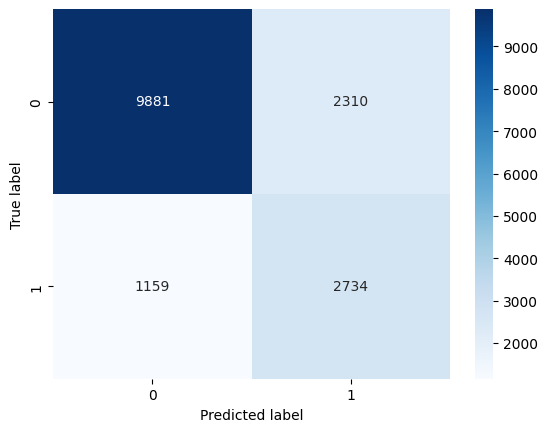

0.6118384245272463
0.627416495069592


In [81]:
svc_best_params = svc_study.trials[15].params

evaluate_study(pipe_SVC,svc_best_params,linear=True)


#### RandomForestClassifier Model

In [21]:
from sklearn.ensemble import RandomForestClassifier


pipe_RFC = imbpipeline(
    [


        ('preprocessor',preprocessor),
        ('over',smoteNC2),
     ('classifier',RandomForestClassifier(n_jobs=4))
     ]
    )


def rfc_space(trial):
    return {
    'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 100, 1000),
    'classifier__max_depth': trial.suggest_int('classifier__max_depth', 1, 20),
    'classifier__min_samples_split': trial.suggest_int('classifier__min_samples_split', 2, 20),
    'classifier__min_samples_leaf': trial.suggest_int('classifier__min_samples_leaf', 1, 20),
    'classifier__max_features': trial.suggest_categorical('classifier__max_features', ['sqrt', 'log2']),
    'classifier__criterion': trial.suggest_categorical('classifier__criterion', ['gini', 'entropy']),
    'over__sampling_strategy': trial.suggest_float("over__sampling_strategy", 0.35, 1.00),
    'over__k_neighbors': trial.suggest_int('over__k_neighbors', 1, 30)
}
rfc_func = lambda trial: objective(trial,pipe_RFC,rfc_space(trial))

rfc_study = optuna.create_study(directions=['maximize','maximize'],pruner=MedianPruner(),study_name='rfc_study',storage='sqlite:///my_study.db',sampler = TPESampler(seed=100))
rfc_study.optimize(rfc_func, n_trials=30,n_jobs=2)



[I 2023-04-27 17:32:00,581] A new study created in RDB with name: rfc_study
[I 2023-04-27 17:35:52,499] Trial 0 finished with values: [0.6457784860397402, 0.6187270393406835] and parameters: {'classifier__n_estimators': 146, 'classifier__max_depth': 4, 'classifier__min_samples_split': 18, 'classifier__min_samples_leaf': 9, 'classifier__max_features': 'log2', 'classifier__criterion': 'gini', 'over__sampling_strategy': 0.5365781966134286, 'over__k_neighbors': 19}. 
[I 2023-04-27 17:35:55,681] Trial 1 finished with values: [0.6455393332818595, 0.6188688022101637] and parameters: {'classifier__n_estimators': 845, 'classifier__max_depth': 15, 'classifier__min_samples_split': 18, 'classifier__min_samples_leaf': 20, 'classifier__max_features': 'log2', 'classifier__criterion': 'gini', 'over__sampling_strategy': 0.589950434213136, 'over__k_neighbors': 27}. 
[I 2023-04-27 17:37:28,900] Trial 2 finished with values: [0.6158567030498819, 0.6152848033012353] and parameters: {'classifier__n_estimato

In [82]:
rfc_study = optuna.load_study(study_name="rfc_study", storage="sqlite:///my_study.db")
optuna.visualization.plot_pareto_front(rfc_study, target_names=["Mean PR AUC", "Mean F1"])

{'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 9, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 881, 'over__k_neighbors': 1, 'over__sampling_strategy': 0.49911191560552626}
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12191
           1       0.61      0.62      0.61      3893

    accuracy                           0.81     16084
   macro avg       0.75      0.75      0.75     16084
weighted avg       0.81      0.81      0.81     16084



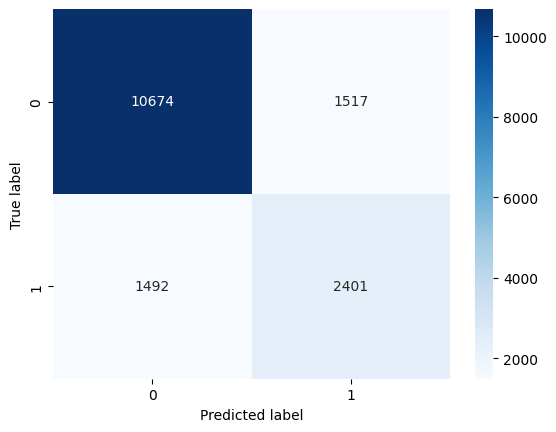

0.6147740366150302
0.6574943365651901


In [83]:

rfc_best_params = rfc_study.trials[25].params
evaluate_study(pipe_RFC,rfc_best_params)


#### LGBM Classifier Model

In [27]:
from lightgbm import LGBMClassifier


pipe_LGBM = imbpipeline(
    [
     ('preprocessor',preprocessor),
     ('over',smoteNC2),
     ('classifier',LGBMClassifier(n_jobs=4,objective='binary'))]
    )

def lgbm_space(trial):
    return {
    'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 100, 1000),
    'classifier__learning_rate': trial.suggest_float('classifier__learning_rate', 0.01, 0.2),
    'classifier__num_leaves': trial.suggest_int('classifier__num_leaves', 30, 150),
    'classifier__min_child_samples': trial.suggest_int('classifier__min_child_samples', 5, 50),
    'classifier__subsample': trial.suggest_float('classifier__subsample', 0.6, 1.0),
    'classifier__colsample_bytree': trial.suggest_float('classifier__colsample_bytree', 0.6, 1.0),
    'classifier__reg_alpha': trial.suggest_float('classifier__reg_alpha', 0.1, 1.0),
    'classifier__reg_lambda': trial.suggest_float('classifier__reg_lambda', 0.1, 1.0),
    'classifier__max_depth': trial.suggest_int('classifier__max_depth', 1, 10),
    'over__sampling_strategy': trial.suggest_float("over__sampling_strategy", 0.35, 1.00),
    'over__k_neighbors': trial.suggest_int('over__k_neighbors', 1, 30)
    }

lgbm_func = lambda trial: objective(trial,pipe_LGBM,lgbm_space(trial))

lgbm_study = optuna.create_study(directions=['maximize','maximize'],pruner=MedianPruner(),study_name='lgbm_study',storage='sqlite:///my_study.db',sampler = TPESampler(seed=100))
lgbm_study.optimize(lgbm_func, n_trials=30,n_jobs=2)



[I 2023-04-27 18:42:08,518] A new study created in RDB with name: lgbm_study
[I 2023-04-27 18:43:15,882] Trial 0 finished with values: [0.6481791433257595, 0.608212027804601] and parameters: {'classifier__n_estimators': 878, 'classifier__learning_rate': 0.0914658479860042, 'classifier__num_leaves': 52, 'classifier__min_child_samples': 39, 'classifier__subsample': 0.8551474722356436, 'classifier__colsample_bytree': 0.6923913504558172, 'classifier__reg_alpha': 0.295762093408928, 'classifier__reg_lambda': 0.45757904384482906, 'classifier__max_depth': 4, 'over__sampling_strategy': 0.6644200991667422, 'over__k_neighbors': 14}. 
[I 2023-04-27 18:43:16,206] Trial 1 finished with values: [0.6481791433257595, 0.608212027804601] and parameters: {'classifier__n_estimators': 734, 'classifier__learning_rate': 0.12262001940318636, 'classifier__num_leaves': 139, 'classifier__min_child_samples': 18, 'classifier__subsample': 0.9551502480484655, 'classifier__colsample_bytree': 0.8836872773395599, 'class

In [84]:
lgbm_study = optuna.load_study(study_name="lgbm_study", storage="sqlite:///my_study.db")
optuna.visualization.plot_pareto_front(lgbm_study, target_names=["Mean PR AUC", "Mean F1"])

{'classifier__colsample_bytree': 0.9444801642063763, 'classifier__learning_rate': 0.03632498277445621, 'classifier__max_depth': 8, 'classifier__min_child_samples': 14, 'classifier__n_estimators': 235, 'classifier__num_leaves': 75, 'classifier__reg_alpha': 0.1950395397952936, 'classifier__reg_lambda': 0.5410531610446644, 'classifier__subsample': 0.9575900967944961, 'over__k_neighbors': 11, 'over__sampling_strategy': 0.4954705242821451}
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     12191
           1       0.61      0.61      0.61      3893

    accuracy                           0.81     16084
   macro avg       0.74      0.74      0.74     16084
weighted avg       0.81      0.81      0.81     16084



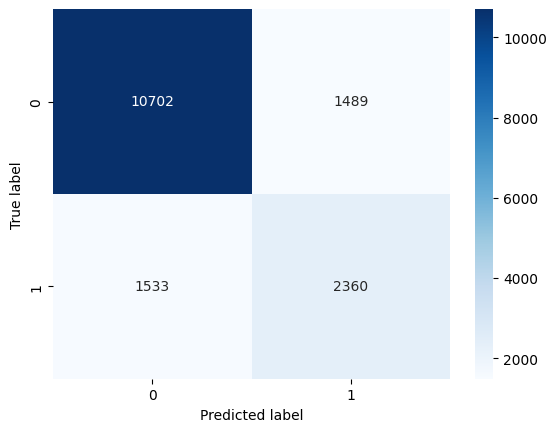

0.6096615861534488
0.6589919445727145


In [85]:

lgbm_best_params = lgbm_study.trials[22].params

evaluate_study(pipe_LGBM,lgbm_best_params)


In [ ]:
from catboost import CatBoostClassifier


    
pipe_CatBoost = imbpipeline(
    [

     ('preprocessor',preprocessor),
              ('over',smoteNC2),

     ('classifier',CatBoostClassifier(thread_count=-1,silent=True,task_type="GPU"))]
    )


def cat_space(trial):
    return {
    'classifier__iterations': trial.suggest_int('classifier__iterations', 100, 1000),
    'classifier__depth': trial.suggest_int('classifier__depth', 1, 10),
    'classifier__learning_rate': trial.suggest_float('classifier__learning_rate', 0.01, 0.3),
    'classifier__l2_leaf_reg': trial.suggest_float('classifier__l2_leaf_reg', 3.0, 17),
    'classifier__loss_function': trial.suggest_categorical('classifier__loss_function', ['Logloss','CrossEntropy']),
    'classifier__bagging_temperature': trial.suggest_float('classifier__bagging_temperature', 0, 1),
    'classifier__bootstrap_type': trial.suggest_categorical('classifier__bootstrap_type', ['Bayesian']),
    'over__sampling_strategy': trial.suggest_float("over__sampling_strategy", 0.35, 1.00),
    'over__k_neighbors': trial.suggest_int('over__k_neighbors', 1, 30)
    }

cat_func = lambda trial: objective(trial,pipe_CatBoost,cat_space(trial),n_jobs=1)


cat_study = optuna.create_study(directions=['maximize','maximize'],pruner=MedianPruner(),study_name='catboost_study',storage='sqlite:///my_study.db',sampler = TPESampler(seed=100))
cat_study.optimize(cat_func, n_trials=30,n_jobs=1)


In [19]:
cat_study = optuna.load_study(study_name="catboost_study", storage="sqlite:///my_study.db")
optuna.visualization.plot_pareto_front(cat_study, target_names=["Mean PR AUC", "Mean F1"])

{'classifier__bagging_temperature': 0.44283997155438665, 'classifier__bootstrap_type': 'Bayesian', 'classifier__depth': 9, 'classifier__iterations': 640, 'classifier__l2_leaf_reg': 8.75337551959668, 'classifier__learning_rate': 0.04025049905197784, 'classifier__loss_function': 'CrossEntropy', 'over__k_neighbors': 22, 'over__sampling_strategy': 0.5129058805845305}
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12191
           1       0.62      0.61      0.61      3893

    accuracy                           0.82     16084
   macro avg       0.75      0.74      0.75     16084
weighted avg       0.81      0.82      0.82     16084



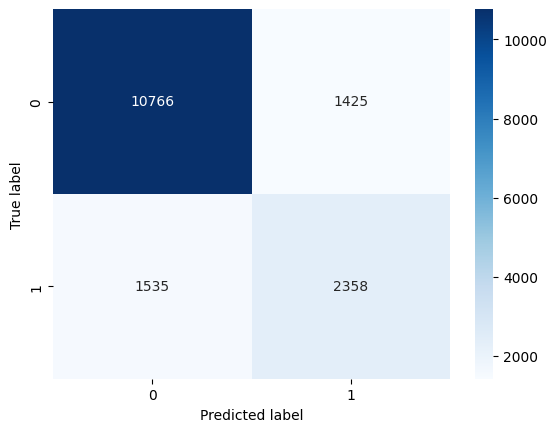

0.614382490880667
0.665956929903449


In [20]:
from catboost import CatBoostClassifier

pipe_CatBoost = imbpipeline(
    [

     ('preprocessor',preprocessor),
        ('over',smoteNC2),

     ('classifier',CatBoostClassifier(thread_count=-1,silent=True,task_type="GPU"))]
    )
cat_best_params = cat_study.trials[22].params
evaluate_study(pipe_CatBoost,cat_best_params)


### Cross validate the Tuned Models 

In [87]:


pipe_SVC = imbpipeline(
    [ 
     ('preprocessor', preprocessor),

    ('over',smoteNC2),

     ('classifier',LinearSVC(dual=False))
     ]
    )
pipe_SVC.set_params(**svc_best_params)


pipe_RFC = imbpipeline(
    [('preprocessor',preprocessor),
        ('over',smoteNC2),
     ('classifier',RandomForestClassifier(n_jobs=4))
     ]
    )
pipe_RFC.set_params(**rfc_best_params)

pipe_LGBM = imbpipeline(
    [
     ('preprocessor',preprocessor),
     ('over',smoteNC2),
     ('classifier',LGBMClassifier(n_jobs=4,objective='binary'))]
    )
pipe_LGBM.set_params(**lgbm_best_params)

catboost_model = CatBoostClassifier(thread_count=-1,silent=True,task_type="GPU")
pipe_CatBoost = imbpipeline(
    [

     ('preprocessor',preprocessor),
              ('over',smoteNC2),

     ('classifier',catboost_model)]
    )
pipe_CatBoost.set_params(**cat_best_params)


models = [
    ('svc', pipe_SVC),
    ('rfc', pipe_RFC),
    ('lgbm', pipe_LGBM),
    ('catboost', pipe_CatBoost)
]

# initialize a list to store the results for each model
results = []

# iterate over the list of models
for name, model in models:
    # evaluate the model using the eval_base_models function
    df = eval_base_models(5, model, X, y)

    # add the model name to the DataFrame
    df['model'] = name

    # add the DataFrame to the list of results
    results.append(df)

df_final_combined = pd.concat(results, ignore_index=True)



Average precision: 0.629 (+/- 0.004)
F1 score: 0.591 (+/- 0.005)
Balanced accuracy: 0.730 (+/- 0.004)
Average precision: 0.658 (+/- 0.003)
F1 score: 0.617 (+/- 0.003)
Balanced accuracy: 0.748 (+/- 0.003)
Average precision: 0.664 (+/- 0.003)
F1 score: 0.617 (+/- 0.004)
Balanced accuracy: 0.747 (+/- 0.003)
Average precision: 0.670 (+/- 0.004)
F1 score: 0.620 (+/- 0.003)
Balanced accuracy: 0.748 (+/- 0.002)


In [88]:
df_final_pivot = df_final_combined.pivot(index='model', columns='score')

# display the pivoted DataFrame
df_final_pivot

mean                                           std  \
score    average_precision balanced_accuracy  f1_score average_precision   
model                                                                      
catboost          0.669896          0.748231  0.619665          0.003500   
lgbm              0.663957          0.747143  0.617057          0.002985   
rfc               0.657994          0.747712  0.617041          0.002914   
svc               0.628626          0.730333  0.591088          0.004457   

                                      
score    balanced_accuracy  f1_score  
model                                 
catboost          0.002422  0.003336  
lgbm              0.003240  0.004117  
rfc               0.002634  0.002895  
svc               0.003762  0.005207

### Chosen Model: CatBoost Classifier

#### Feature Importance

In [89]:
def plot_feature_importance(model,X,y):
# Create a StratifiedKFold object
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize an empty list to store the feature importances for each fold
    feature_importances = []

    # Loop over each fold
    for train_index, test_index in cv.split(X, y):
        # Split the data into training and validation sets
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the pipeline on the training data
        model.fit(X_train_cv, y_train_cv)
        
        # Access the fitted CatBoost model from the pipeline
        catboost_model = model.named_steps['classifier']
        
        # Calculate the feature importances
        fi = catboost_model.get_feature_importance()
        
        # Append the feature importances to the list
        feature_importances.append(fi)

    # Calculate the average feature importance for each feature
    feature_importances = pd.DataFrame(feature_importances, columns=X.columns)
    avg_feature_importances = feature_importances.mean(axis=0)

    # Create a DataFrame with average feature importances and feature names
    fi_df = pd.DataFrame({'feature_importance': avg_feature_importances,
                        'feature_names': X.columns})

    # Sort the DataFrame by average feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # Plot Seaborn bar chart
    plt.figure(figsize=(10, 8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    # Add chart labels
    plt.title('AVERAGE CATBOOST FEATURE IMPORTANCE ACROSS 5 FOLDS')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

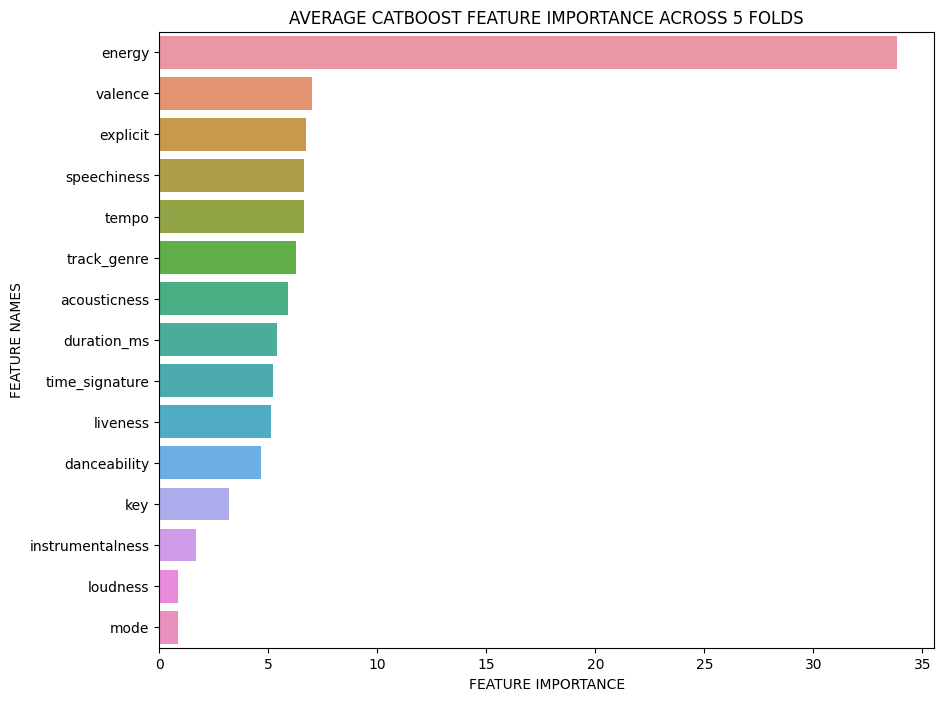

In [90]:
plot_feature_importance(pipe_CatBoost,X,y)

### Saving the best model

In [21]:
import joblib
pipe_final_CatBoost = imbpipeline(
    [

     ('preprocessor',preprocessor),
              ('over',smoteNC2),

     ('classifier',CatBoostClassifier(thread_count=-1,silent=True,task_type="GPU"))]
    )
pipe_final_CatBoost.set_params(**cat_best_params)

pipe_final_CatBoost.fit(X,y)

joblib.dump(pipe_final_CatBoost,'final_model.pkl')


['final_model.pkl']